# 대선자료 시각화

In [5]:
# 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 2022 대선 데이터 불러오기
election = pd.read_csv('data/election_2022.csv')

# 데이터 분석
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [7]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [8]:
# dimension 확인하기
election.shape

(248, 7)

In [9]:
# 컬럼별 자료형과 null 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [10]:
# null 확인
election.isnull().sum()

광역시도    0
시군구     0
선거인수    0
투표수     0
이재명     0
윤석열     0
심상정     0
dtype: int64

In [11]:
# 4번째 ~ 6번째컬럼의 합계를 구하는 컬럼
election['electionSum'] = election.iloc[:, 4:7].sum(axis=1)


election.head()


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [12]:
# electionRatio를 소수점 2자리까지 구하는 컬럼 추가
election['electionRatio'] =  round(election['electionSum'] / election['투표수'] * 100, 2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [13]:
# csv 파일로 저장
election.to_csv('data/election_2022_2.csv', index=False)

---
### 광역시별 투표율을 Pie Chart로 표현하기

In [14]:
# 광역시도 Column 별 투표수 합계 구하기
election_g = election.groupby('광역시도').sum()
election_g.head()

# 광역시도 피벗테이블 만들기
election_g_pivot = pd.pivot_table(election_g, index='광역시도', values=['투표수']).sort_values(by='투표수', ascending=False)
# 정렬하기
election_g_pivot.head()

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504


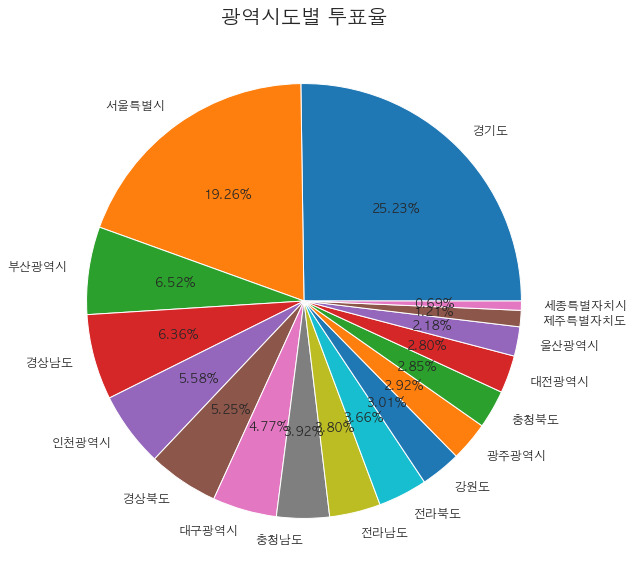

In [15]:
# chart 배경 하얗게 만들기
sns.set_style('whitegrid')
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
# 투표수 순으로 정렬해 Pie chart 그리기
election_g['투표수'].sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%', figsize=(10, 10),fontsize=12)
# ylabel 없애기
plt.ylabel('')
# title
plt.title('광역시도별 투표율', fontsize=20, fontweight='bold')
plt.show()

array([<AxesSubplot:ylabel='투표수'>], dtype=object)

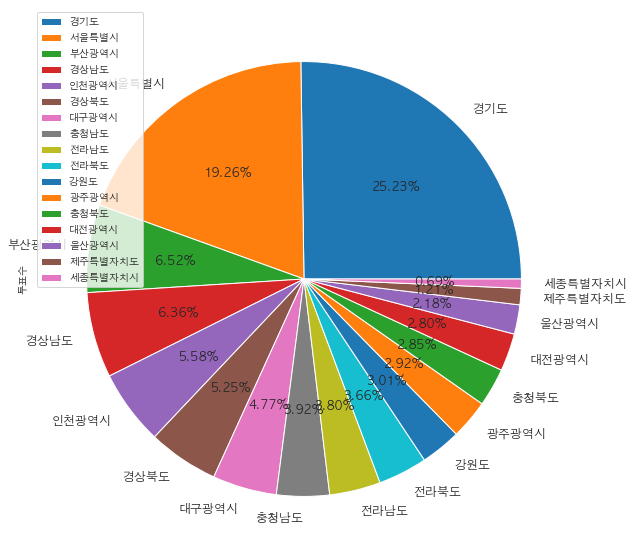

In [16]:
# 피벗 테이블로 파이차트 그리기
election_g_pivot.plot(kind='pie', autopct='%1.2f%%', figsize=(10, 10),fontsize=12, subplots=True)

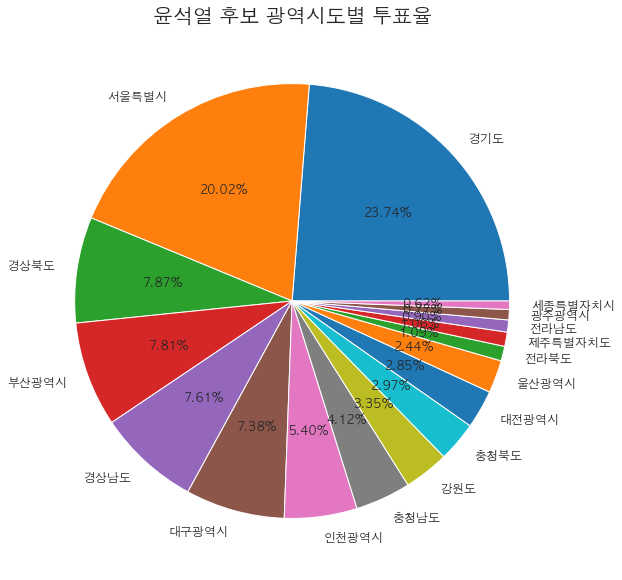

In [17]:
# chart 배경 하얗게 만들기
sns.set_style('whitegrid')
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
# 투표수 순으로 정렬해 Pie chart 그리기
election_g['윤석열'].sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%', figsize=(10, 10),fontsize=12)
# ylabel 없애기
plt.ylabel('')
# title
plt.title('윤석열 후보 광역시도별 투표율', fontsize=20, fontweight='bold')
plt.show()

In [18]:
election_seoul = election[election['광역시도'] == '서울특별시'].sort_values(by='윤석열', ascending=False)

election_top5 = election_seoul.head(5)
election_others = election_seoul.tail(-5)

# election_others sum by rows
election_others_sum = election_others.sum(axis=0)
# first value= '서울특별시'
election_others_sum[0] = '서울특별시'
election_others_sum[1] = '기타'


# add row to election_top5
election_top5 = election_top5.append(election_others_sum, ignore_index=True)
# index = '시군구'
election_top5.index = election_top5['시군구']

election_top5

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
시군구,,,,,,,,,
송파구,서울특별시,송파구,565840,453536,180490,255166,10652,446308,98.41
강남구,서울특별시,강남구,451970,354778,106865,235897,7020,349782,98.59
강서구,서울특별시,강서구,504185,390247,190000,181510,11100,382610,98.04
서초구,서울특별시,서초구,344756,277878,88686,179472,5864,274022,98.61
노원구,서울특별시,노원구,441879,349297,169275,163340,10021,342636,98.09
기타,서울특별시,기타,6038017,4676095,2209665,2240362,135667,4585694,1961.32


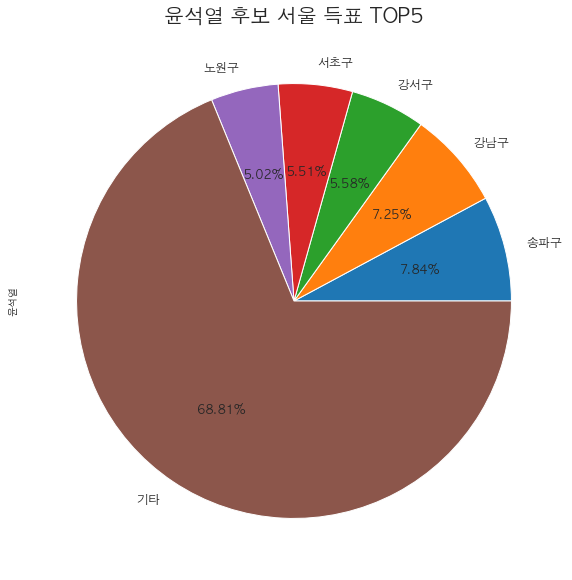

In [19]:
# chart 배경 하얗게 만들기
sns.set_style('whitegrid')
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
# 투표수 순으로 정렬해 Pie chart 그리기
election_top5['윤석열'].plot(kind='pie', autopct='%1.2f%%', figsize=(10, 10),fontsize=12)

# title
plt.title('윤석열 후보 서울 득표 TOP5', fontsize=20, fontweight='bold')

plt.show()

---
### 대선주자 출생지별 득표율 분석
- 윤석열 후보 - 서울시 성북구

In [38]:
# sum of '윤석열', '이재명', '심상정' col

election['기타'] = election['투표수'] - (election['윤석열'] + election['이재명'] + election['심상정'])
성북구 = election[election['시군구'] == '성북구']

# select 이재명, 윤석열, 심상정 col
성북구 = 성북구[['윤석열', '이재명', '심상정', '기타']]
성북구


,윤석열,이재명,심상정,기타
7,135044,142702,8952,5489


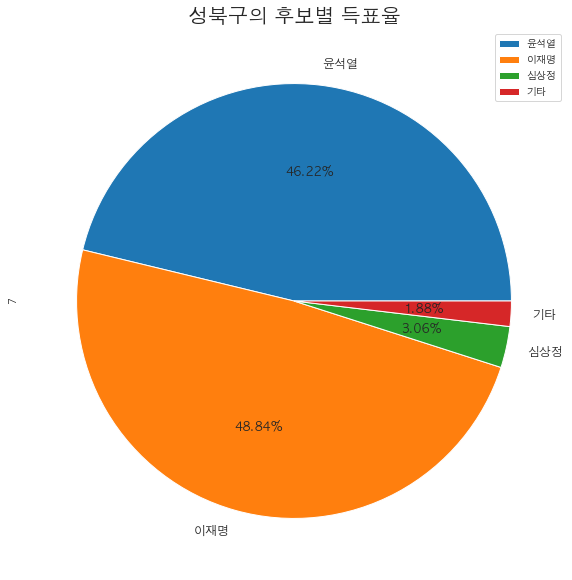

In [39]:

# chart 배경 하얗게 만들기
sns.set_style('whitegrid')
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
# 투표수 순으로 정렬해 Pie chart 그리기
성북구.T.plot(kind='pie', autopct='%1.2f%%', figsize=(10, 10),fontsize=12, subplots=True)

# title
plt.title('성북구의 후보별 득표율', fontsize=20, fontweight='bold')

plt.show()

---
### 투표수가 가장 많은 4지역의 후보별 득표수 차이

In [80]:
import seaborn as sns
sns.set_style('whitegrid')

# draw sns.barplot with election_g_top4, x list
sns.barplot(x='윤석열', y=election_g_top4.index, data=election_g_top4, color='red')
sns.



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().